# Python绘制污染玫瑰图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#获取数据" data-toc-modified-id="获取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>获取数据</a></span></li><li><span><a href="#处理数据" data-toc-modified-id="处理数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>处理数据</a></span></li><li><span><a href="#生成网格数据" data-toc-modified-id="生成网格数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>生成网格数据</a></span></li><li><span><a href="#绘制污染玫瑰图" data-toc-modified-id="绘制污染玫瑰图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>绘制污染玫瑰图</a></span></li><li><span><a href="#自定义cmap" data-toc-modified-id="自定义cmap-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>自定义cmap</a></span></li><li><span><a href="#使用pcolormesh实现" data-toc-modified-id="使用pcolormesh实现-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>使用pcolormesh实现</a></span></li></ul></div>

整体的思路是使用`contourf`函数实现污染玫瑰图，具体步骤如下:<br>
+ 读取数据
+ 处理数据
+ 数据网格化
+ 绘制污染玫瑰图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 获取数据
这里我使用的是完整的数据，其中没有nan(缺失值)。我建议在绘图之前如果有缺失或异常数据需要认真处理。这里我们主要展示绘图部分

In [2]:
file = r'../data/20年2月污染气象参数.xls'
data = pd.read_excel(file, usecols=['时间', '风速(m/s)', '风向(deg)', 'PM2.5'], index_col=0).iloc[:115, :]
data

,风向(deg),风速(m/s),PM2.5
时间,,,
2020-02-01 00:00,229.9,1.3,106
2020-02-01 01:00,239.3,1.1,110
2020-02-01 02:00,243.2,0.7,98
2020-02-01 03:00,292.7,0.4,77
2020-02-01 04:00,288.2,0.5,85
...,...,...,...
2020-02-05 14:00,75.9,4.3,9
2020-02-05 15:00,73.3,4.3,12
2020-02-05 16:00,79.1,4.5,1


## 处理数据
1. 将风向数据转化为弧度数据

In [3]:
data['风向(deg)'] = np.radians(data['风向(deg)'])

2. 处理风速风向分类的单位

In [4]:
v = data['风速(m/s)']
# 风速按16等分分类
speed = np.linspace(v.min(), v.max(), endpoint=True, num=16)
# 风向按32等分分类
deg = np.linspace(0, 2*np.pi, endpoint=True, num=32)

## 生成网格数据

In [5]:
def maker(s, sequence):
    '''
    将划分网格内的数据按较小值划分
    '''
    for i, val in enumerate(sequence):
        if s <= sequence[i+1]:
            return val

In [6]:
d = data['风向(deg)']
data['风速(m/s)'] = v.apply(maker, sequence=speed)
data['风向(deg)'] = d.apply(maker, sequence=deg)
data.head()

,风向(deg),风速(m/s),PM2.5
时间,,,
2020-02-01 00:00,3.850985,1.14,106
2020-02-01 01:00,4.053668,0.86,110
2020-02-01 02:00,4.053668,0.58,98
2020-02-01 03:00,5.067085,0.30,77
2020-02-01 04:00,4.864402,0.30,85


+ 使用mean方法对PM2.5数据进行栅格化分类

In [7]:
# 由于整体PM2.5数据有标记，所以需要将2.5数据处理成float类型
data['PM2.5'] = data['PM2.5'].astype(float)
dt = data.pivot_table(values='PM2.5', index='风速(m/s)', columns='风向(deg)', aggfunc=np.mean)
# 补齐网格并对于缺失的网格用0值填充，这样绘图的效果好一些
dt.fillna(0, inplace=True)
dt = dt.reindex(index=speed, columns=deg, fill_value=0)
dt.head(6)

风向(deg),0.000000,0.202683,0.405367,0.608050,0.810734,1.013417,1.216100,1.418784,1.621467,1.824151,...,4.459035,4.661718,4.864402,5.067085,5.269768,5.472452,5.675135,5.877819,6.080502,6.283185
风速(m/s),,,,,,,,,,,,,,,,,,,,,
0.30,62.0,61.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,85.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0
0.58,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,0.0
0.86,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.14,0.0,89.0,0.0,0.0,0.0,0.0,0.0,66.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.42,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,91.5,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.70,67.0,114.0,0.0,78.0,0.0,36.0,21.0,0.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 绘制污染玫瑰图

1. `meshgrid()`将网格数据生成绘制数据 

In [8]:
theta, r = np.meshgrid(deg, speed)

2. 使用`contourf()`绘制污染玫瑰图

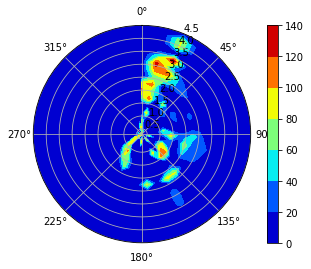

In [9]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise')
pos = ax.contourf(theta, r, dt.to_numpy(), cmap='jet')
plt.colorbar(pos, ax=ax)
plt.show()

## 自定义cmap
目前默认使用的是jet的配色，计划实现自定义线性数值对于的颜色线性分布的cmap。

1. 自定义颜色和取值区间

In [10]:
import matplotlib as mpl

In [17]:
# 数值区间
bounds = [0, 35, 75, 115, 150]
# 两种定义颜色的方式都可以
colors = ['#00E400', '#FEFF05', '#FF7E00', '#FE0000']
# colors = [np.array([0, 228, 0])/255, np.array([254, 255, 5])/255,
#           np.array([255, 126, 0])/255, np.array([254, 0, 0])/255]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

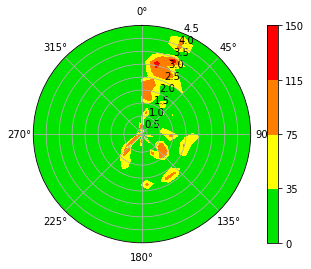

In [18]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise')
pos = ax.contourf(theta, r, dt.to_numpy(), levels=bounds, colors=colors)
plt.colorbar(pos, ax=ax)
plt.show()

## 使用pcolormesh实现

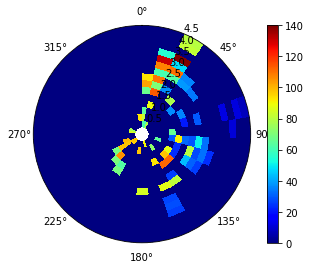

In [16]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise')
pos = ax.pcolormesh(theta, r, dt.to_numpy(), cmap='jet', vmax=140)
plt.colorbar(pos, ax=ax)
plt.show()